# Function pconv

- 2D or 3D Periodic Convolution. 

## Synopse

1D,2D or 3D Periodic convolution.

- **g = pconv(f, h)**

  - **g**: Image. 


  - **f**: Image. Input image.
  - **h**: Image. PSF (point spread function), or kernel. The origin is at the array center.


## Description

- Perform a 1D, 2D or 3D discrete periodic convolution. The kernel origin is at the center of image h. Both image and kernel are periodic with same period. Usually the kernel h is smaller than the image f, so h is padded with zero until the size of f.

In [45]:
def pconv4(f,h):
    import numpy as np

    h_ind=np.nonzero(h)
    f_ind=np.nonzero(f)
    if len(h_ind[0])>len(f_ind[0]):
        h,    f    = f,    h
        h_ind,f_ind= f_ind,h_ind

    gs = np.maximum(np.array(f.shape),np.array(h.shape))
    if (f.dtype == 'complex') or (h.dtype == 'complex'):
        g = np.zeros(gs,dtype='complex')
    else:
        g = np.zeros(gs)

    f1 = g.copy()
    f1[f_ind]=f[f_ind]      

    if f.ndim == 1:
        (W,) = gs
        col = np.arange(W)
        for cc in h_ind[0]:
            g[:] += f1[(col-cc)%W] * h[cc]

    elif f.ndim == 2:
        H,W = gs
        row,col = np.indices(gs)
        for rr,cc in np.transpose(h_ind):
            g[:] += f1[(row-rr)%H, (col-cc)%W] * h[rr,cc]

    else:
        Z,H,W = gs
        d,row,col = np.indices(gs)
        for dd,rr,cc in np.transpose(h_ind):
            g[:] += f1[(d-dd)%Z, (row-rr)%H, (col-cc)%W] * h[dd,rr,cc]
    return g

In [46]:
from numpy import *

def pconv(f, h):

    f, h = asarray(f), asarray(h,dtype=float)
    #faux, haux = ravel(f), ravel(h)

    s = f.shape
    # Checking the shape of the image F.
    if len(f.shape) == 1: 
        f = f[newaxis,newaxis,:]
    elif len(f.shape) == 2:
        f = f[newaxis,:,:]

    # Checking the shape of the image H.
    if len(h.shape) == 1: 
        h = h[newaxis,newaxis,:]
    elif len(h.shape) == 2:
        h = h[newaxis,:,:]

    # Getting the dimensions of images F and H
    (fslices, frows, fcols) = f.shape
    (hslices, hrows, hcols) = h.shape

    ds1 = int((hslices-1)/2.)
    ds2 = hslices - ds1

    dr1 = int((hrows-1)/2.)
    dr2 = hrows - dr1

    dc1 = int((hcols-1)/2.)
    dc2 = hcols - dc1

    p = concatenate((concatenate((f[-ds2+1::,:,:], f)), f[0:ds1,:,:]))
    p = concatenate((concatenate((p[:,-dr2+1::,:], p), 1), p[:,0:dr1,:]), 1)
    p = concatenate((concatenate((p[:,:,-dc2+1::], p), 2), p[:,:,0:dc1]), 2)

    g = zeros((fslices,frows,fcols))

    for i in range(hslices):
        for j in range(hrows):
            for k in range(hcols):
                hw = h[hslices-i-1, hrows-j-1, hcols-k-1]
                if (hw):
                    g = g + h[hslices-i-1,hrows-j-1,hcols-k-1] * p[i:fslices + i,j:frows + j, k:fcols + k]
    g.shape = s
    return g

In [47]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ! jupyter nbconvert --to 'python' pconv
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook pconv.ipynb to python
[NbConvertApp] Writing 7382 bytes to pconv.py


## Examples

Numerical Example 1D

In [48]:
if testing:
    f = np.array([1,0,0,0,0,1,0,0,0])
    print("\n Image (f):")
    print(f)
    
    h = np.array([1,2,3])
    print("\n Image Kernel (h):")
    print(h)
    
    result = pconv(f,h)
    print("\n Image Output - (g):")
    print(result)


 Image (f):
[1 0 0 0 0 1 0 0 0]

 Image Kernel (h):
[1 2 3]

 Image Output - (g):
[ 2.  3.  0.  0.  1.  2.  3.  0.  1.]


Numerical Example 2D

In [49]:
if testing:
    f = np.array([[1,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,1,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,1],
                 [0,0,0,0,0,0,0,0,0]])
    print("\n Image (f):")
    print(f)
    
    h = np.array([[1,2,3],
                 [4,5,6]])
    print("\n Image Kernel (h):")
    print(h)
    
    result = pconv(f,h)
    print("\n Image Output - (G):")
    print(result)


 Image (f):
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]]

 Image Kernel (h):
[[1 2 3]
 [4 5 6]]

 Image Output - (G):
[[ 2.  3.  0.  0.  0.  0.  0.  0.  1.]
 [ 5.  6.  0.  0.  0.  0.  0.  0.  4.]
 [ 0.  0.  1.  2.  3.  0.  0.  0.  0.]
 [ 3.  0.  4.  5.  6.  0.  0.  1.  2.]
 [ 6.  0.  0.  0.  0.  0.  0.  4.  5.]]


Numerical Example 3D

In [50]:
if testing:
    f = zeros((3,3,3))
    f[0,1,1] = 1
    f[1,1,1] = 1
    f[2,1,1] = 1
     
    print("\n Image Original (F): ")
    print(f)

    h = np.array([[[ 1,  2, 3 ],[ 3,  4, 5 ], [ 5,  6, 7 ]],
                [ [ 8,  9, 10],[11, 12, 13], [14, 15, 16]],
                [ [17, 18, 19],[20, 21, 22], [23, 24, 25]]])
              
    print("\n Image Kernel (H): ")
    print(h)
    
    result = pconv(f,h)
    print("\n Image Output - (G): ")
    print(result)


 Image Original (F): 
[[[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  0.]]]

 Image Kernel (H): 
[[[ 1  2  3]
  [ 3  4  5]
  [ 5  6  7]]

 [[ 8  9 10]
  [11 12 13]
  [14 15 16]]

 [[17 18 19]
  [20 21 22]
  [23 24 25]]]

 Image Output - (G): 
[[[ 26.  29.  32.]
  [ 34.  37.  40.]
  [ 42.  45.  48.]]

 [[ 26.  29.  32.]
  [ 34.  37.  40.]
  [ 42.  45.  48.]]

 [[ 26.  29.  32.]
  [ 34.  37.  40.]
  [ 42.  45.  48.]]]


Example with Image 2D


Prewitt´s Mask
[[-1, -1, -1], [0, 0, 0], [1, 1, 1]]


""
a) - Original Image
""
b) Prewitt´s Mask filtering
""
c) absolute of Prewitt´s Mask filtering

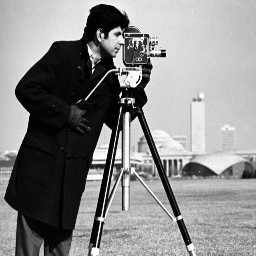
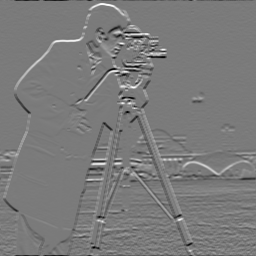
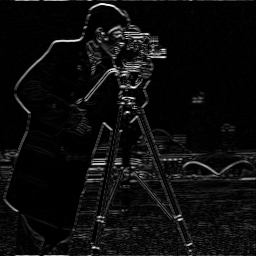

In [51]:
if testing:
    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    nb = ia.nbshow(3)
    nb.nbshow(f, title = 'a) - Original Image')
    h = [[-1,-1,-1],[0,0,0],[1,1,1]]
    g = pconv(f,h)
    print("\nPrewitt´s Mask")
    print(h)
    
    gn = ia.normalize(g, [0,255])
    nb.nbshow(gn, title = 'b) Prewitt´s Mask filtering')

    nb.nbshow(ia.normalize(abs(g)), title = 'c) absolute of Prewitt´s Mask filtering')
    nb.nbshow()

Example with Image 3D

""
Figure a) - Original Image
""
Figure b) - 3D Periodic Convolution. - Prewitt´s Mask
""
Figure c) - 3D Periodic Convolution. - Prewitt´s Mask (Negative)

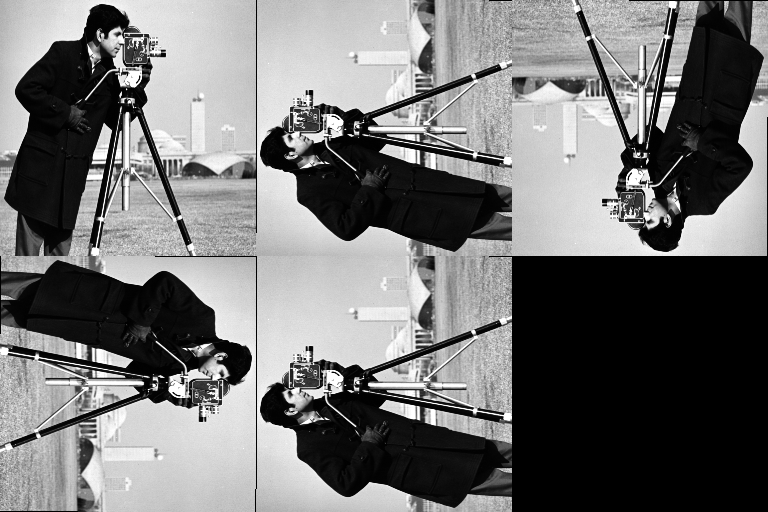
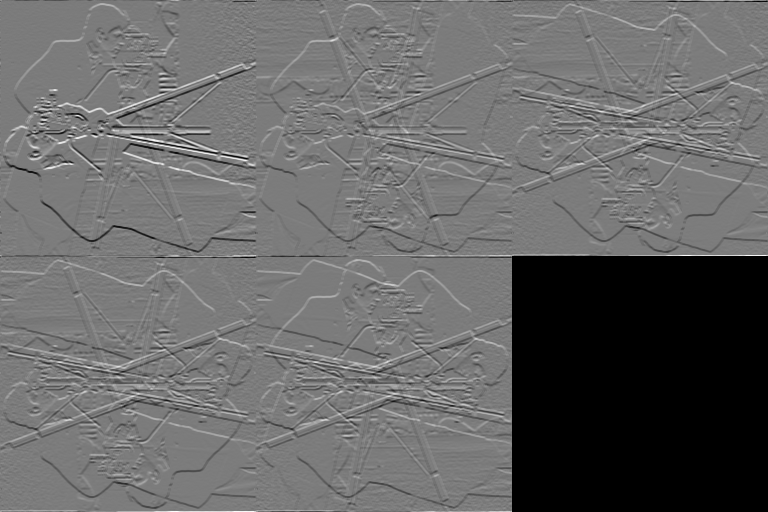
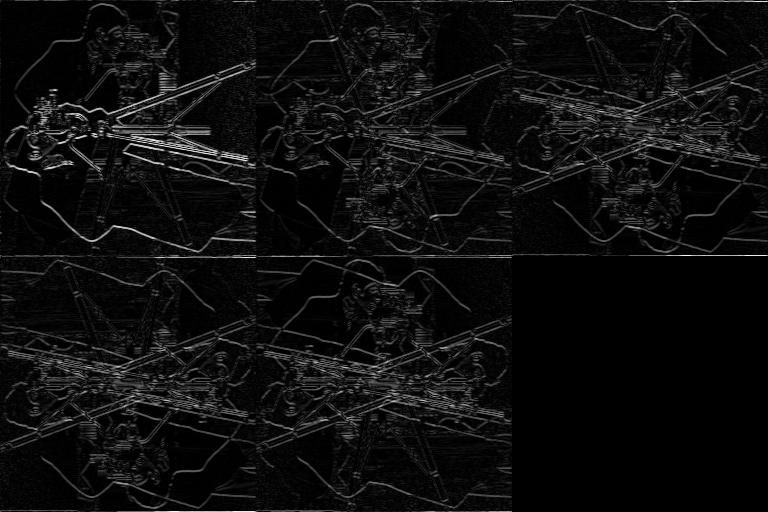

In [44]:
if testing:

    f = mpimg.imread('/home/lotufo/ia898/data/cameraman.tif')
    f3d = np.stack((np.copy(f)
                    ,scipy.ndimage.interpolation.rotate(f, 90, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 180, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 270, reshape=False)
                    ,scipy.ndimage.interpolation.rotate(f, 90, reshape=False)))
    
    linhas,colunas,fatias = f3d.shape
    
    h = np.array([[[-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1 ]],
                 [ [-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1]],
                 [ [-1, -1, -1 ],
                   [ 0,  0,  0], 
                   [ 1,  1,  1 ]]])
    
    g = pconv(f3d,h)
    
    gdata = ia.normalize(f3d).astype(uint8)    
    gn = ia.normalize(g).astype(uint8)
    gn1 = ia.normalize(abs(g)).astype(uint8)
      
    nb = ia.nbshow(3)
    nb.nbshow(ia.mosaic(gdata,3), title ='Figure a) - Original Image') 
    nb.nbshow(ia.mosaic(gn,   3), title ='Figure b) - 3D Periodic Convolution. - Prewitt´s Mask')  
    nb.nbshow(ia.mosaic(gn1,  3), title ='Figure c) - 3D Periodic Convolution. - Prewitt´s Mask (Negative)')
    nb.nbshow()

## Equation

$$
f(x) = f(x + kN), h(x)=h(x+kN)
$$

$$
mod(x,N) = x - N \lfloor \frac{x}{N} \rfloor 
$$

$$
(f \ast_N h) (x) =\sum_{i=0}^{N-1} f(i) h(mod(x-i,N)) 
$$

$$
(f \ast_{(N,M)} h) (x,y) = \sum_{i=0}^{N-1} \sum_{j=0}^{M-1} f(i,j) h(mod(x-i,N), mod(y-j,M))
$$

$$
(f \ast_{(P,N,M)} h) (x,y,z) =  \sum_{i=0}^{P-1} \sum_{j=0}^{N-1} \sum_{k=0}^{M-1} f(i,j,k) h(mod(x-i,P), mod(y-j,N), mod(z-j,M))
$$

## Limitations

Both image and kernel are internally converted to double.

## See Also

- `conv conv`  -- 2D or 3D convolution.
- `ptrans ptrans`  -- Periodic translation.
- `convteo convteo`  -- Illustrate the convolution theorem.

## Contributions

- Danilo Rodrigues Pereira, 1st semester 2011
- Leonardo Bianconi, 1st semester 2017

In [52]:
if testing:
    print('testing pconv')
    print(repr(pconv(array([[1,0,1,0],[0,0,0,0]]), array([1,2,3]))) == repr(array(
          [[ 2.,  4.,  2.,  4.],
           [ 0.,  0.,  0.,  0.]])))

testing pconv
True
